<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/4zadanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

1. Применить один из бустовых классификаторов к своему датасету, кроссвалидацией оценить accuracy. Как она соотносится с accuracy из задания к семинару 3?
2. Визуализировать оценку важности признаков в обученном классификаторе.

**Имя столбца	Описание столбца**

name	Имя игрока НБА

gp	Количество сыгранных игр

min	Количество сыгранных минут за игру

pts	Среднее количество очков за игру

fgm	Среднее количество бросков с игры за игру

fga	Среднее количество попыток бросков с игры за игру

fg	Средний процент попаданий с игры за игру

3p_made	Среднее количество трехочковых бросков с игры за игру

3pa	Среднее количество трехочковых бросков с игры за игру

3p	Средний процент трехочковых бросков с игры, забитых за игру

ftm	Среднее количество штрафных бросков за игру

fta	Среднее количество попыток штрафных бросков за игру

ft	Средний процент штрафных бросков за игру

oreb	Среднее количество подборов в атаке за игру

dreb	Среднее количество подборов в защите за игру

reb	Среднее количество подборов за игру

ast	Среднее количество передач за игру

stl	Среднее количество перехватов за игру

blk	Среднее количество блоков за игру

tov	Среднее количество потерь за игру

target_5yrs	1, если продолжительность карьеры >= 5 лет, 0 в противном случае.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/nba-players.csv')
df

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [41]:
yt = df.target_5yrs.values
Xt = df.drop(['name', 'target_5yrs','Unnamed: 0'], axis=1)
Xt.sample(5)

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov
123,82,31.5,11.4,5.2,11.3,46.1,0.3,1.0,27.7,0.8,1.3,58.9,0.7,2.0,2.6,6.8,1.6,0.3,1.7
1187,35,7.7,2.2,0.9,1.6,52.6,0.0,0.1,0.0,0.5,0.8,55.2,0.5,1.2,1.7,0.2,0.1,0.1,0.4
6,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7
897,79,20.4,8.7,3.6,7.9,45.5,0.6,1.8,31.2,0.9,1.4,68.2,0.7,1.8,2.4,3.0,1.0,0.0,1.5
1117,24,8.5,2.1,0.6,2.1,29.4,0.3,1.0,26.1,0.6,0.8,75.0,0.1,0.8,0.9,0.8,0.2,0.0,0.5


In [42]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.25)

In [43]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(Xt_train, yt_train)

CPU times: user 337 ms, sys: 274 µs, total: 337 ms
Wall time: 339 ms


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

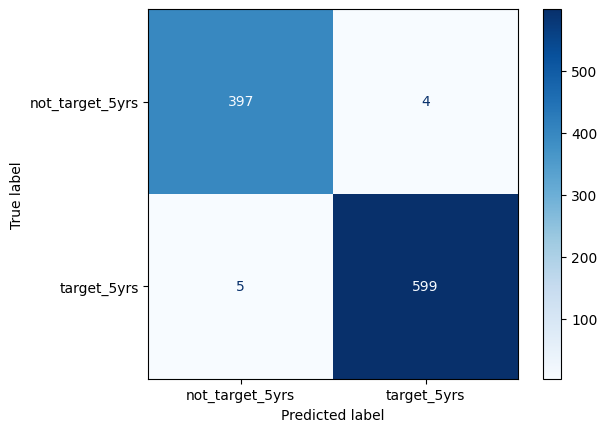

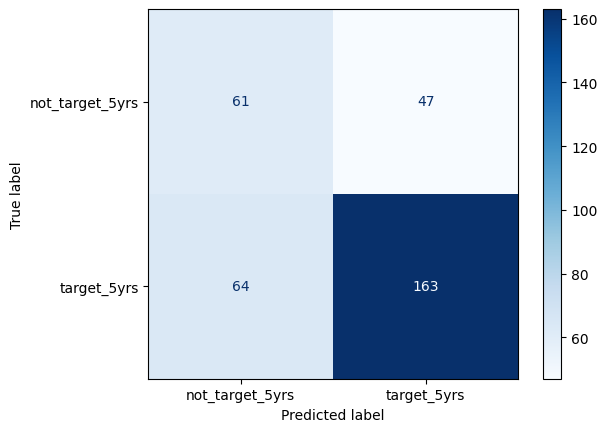

In [45]:
def plot_confusion(model, Xt, yt, class_names=['not_target_5yrs', 'target_5yrs']):
    ConfusionMatrixDisplay.from_estimator(model, Xt, yt, cmap=plt.cm.Blues, display_labels=class_names, values_format='d')
plot_confusion(rf, Xt_train, yt_train)
plot_confusion(rf, Xt_test, yt_test)

In [46]:
rf.score(Xt_test, yt_test)

0.6686567164179105

<Axes: >

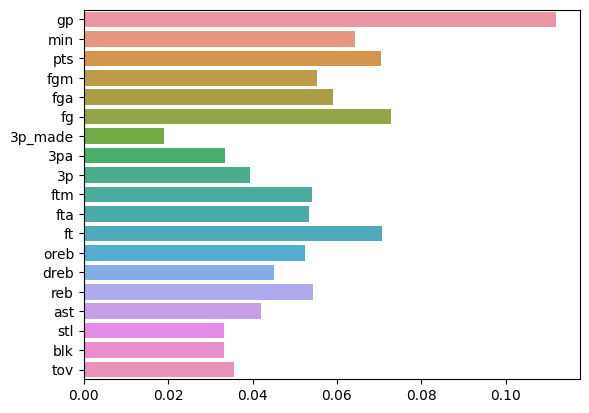

In [47]:
sns.barplot(x=rf.feature_importances_, y=Xt_train.columns)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

0.6805970149253732

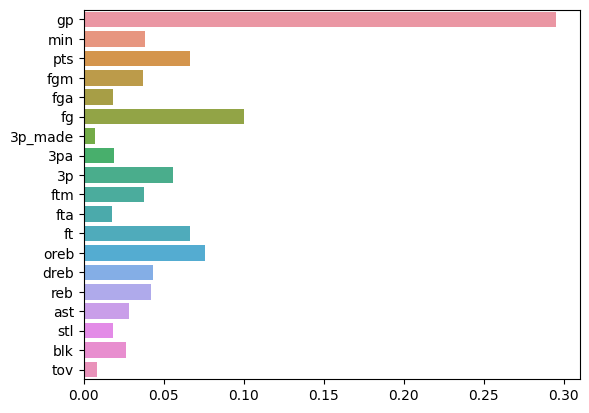

In [49]:
gb = GradientBoostingClassifier().fit(Xt_train, yt_train)
sns.barplot(x=gb.feature_importances_, y=Xt_train.columns)
gb.score(Xt_test, yt_test)

Кроссвалидация

In [50]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(32, test_size=2, random_state=13)
cv

ShuffleSplit(n_splits=32, random_state=13, test_size=2, train_size=None)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.model_selection import cross_val_score
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(5):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  sc = cross_val_score(model, Xt_test, yt_test, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]
score

,mean,std
0,0.216025,0.106822
1,0.174687,0.136430
2,1.138546,2.172151
3,8.847445,10.795747
4,988.425966,5484.208980


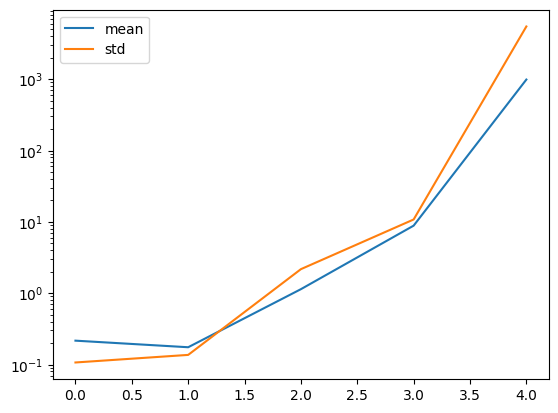

In [53]:
score.plot(logy=True)
plt.show()

In [54]:
print("Accuracy score (training): {0:.3f}".format(gb.score(Xt_train, yt_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(Xt_test, yt_test)))

Accuracy score (training): 0.879
Accuracy score (validation): 0.681
